#**Sujet :** Impact de l'IA sur le marché de l'emploi (2024-2030)


**Description :**

Ce projet explore l'impact croissant de l'adoption de l'Intelligence Artificielle (IA) sur le marché du travail mondial. Il examine en détail comment cette technologie transforme les métiers, en se concentrant sur les métiers en augmentation ou en diminution en raison de l'IA, les compétences requises et leur évolution face à l'automatisation..





> Data Source :https://www.kaggle.com/datasets/sahilislam007/ai-impact-on-job-market-20242030/code

# **Phase 1 — Business Understanding**

| BO  |   DSO (one precise objective) | Type  | Model examples     |
| --- | ------------------------- | -------------- | ------------------------ |
| **BO1: Aide les entreprises à anticiper les métiers à recruter et adapter leurs plans RH et formation** | Classifier des métiers selon trajectoire 2024→2030(croissance / stable / déclin). | Classification | Random Forest, XGBoost, Logistic Regression |
| **BO2: Permet aux professionnels et aux entreprises de planifier la reconversion et les formations adaptées** | Estimer le % de risque d’automatisation pour chaque métier. | Regression | Gradient Boosting Regressor , Random Forest Regressor|
| **BO3: Aligner les programmes éducatifs sur les besoins futurs du marché du travail** | Regrouper et extraire clusters de compétences émergentes à partir de descriptions d’emploi. | Clustering |   K-Means on TF-IDF, HDBSCAN |
| **BO4: Aider les multinationales à choisir les implantations pour le recrutement et l’investissement** | Prévoir le nombre de postes ouverts par pays/secteur en 2030. | Regression | Linear Regression, Random Forest Regressor, XGBoost Regressor |
| **BO5: Permettre aux candidats et aux entreprises de prioriser les métiers stables et rémunérateurs** | Classer la stabilité d’un métier (stable vs à risque de déclin). | Classification | Logistic Regression, Random Forest, XGBoost|
| **BO6: Aider les entreprises à planifier le télétravail et les politiques RH flexibles** | Estimer faisabilité et impact du télétravail par métier  | Classification | Logistic Regression , Random Forest |




#**Phase 2 — Data Understanding**

**IMPORT DES LIBRAIRIES ET CHARGEMENT DES DONNÉES**




In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
INPUT_CSV = "ai_job_trends_dataset.csv"             # adjust path if needed
OUTPUT_PREPARED_CSV = "prepared_data.csv"  # saved BEFORE PCA
OUTPUT_PCA_CSV = "dataset_reduit.csv"          # saved AFTER PCA

# Load the data
df = pd.read_csv("data/ai_job_trends_dataset.csv")

# --- BASIC DESCRIPTION ---
print("Dataset Shape:", df.shape)
print("Colonnes:", df.columns.tolist())
print(f"\nTypes de données:\n{df.dtypes}")

Dataset Shape: (30000, 13)
Colonnes: ['Job Title', 'Industry', 'Job Status', 'AI Impact Level', 'Median Salary (USD)', 'Required Education', 'Experience Required (Years)', 'Job Openings (2024)', 'Projected Openings (2030)', 'Remote Work Ratio (%)', 'Automation Risk (%)', 'Location', 'Gender Diversity (%)']

Types de données:
Job Title                       object
Industry                        object
Job Status                      object
AI Impact Level                 object
Median Salary (USD)            float64
Required Education              object
Experience Required (Years)      int64
Job Openings (2024)              int64
Projected Openings (2030)        int64
Remote Work Ratio (%)          float64
Automation Risk (%)            float64
Location                        object
Gender Diversity (%)           float64
dtype: object


#**Analyse exploratoire**

In [30]:
df.head(5)

,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)
0,Investment analyst,IT,Increasing,Moderate,42109.76,Master’s Degree,5,1515,6342,55.96,28.28,UK,44.63
1,"Journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master’s Degree,15,1243,6205,16.81,89.71,USA,66.39
2,Financial planner,Finance,Increasing,Low,143279.19,Bachelor’s Degree,4,3338,1154,91.82,72.97,Canada,41.13
3,Legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76
4,Aeronautical engineer,IT,Increasing,Low,60956.63,Master’s Degree,13,5944,7396,53.76,37.65,Germany,72.57


In [31]:
print("\nInfo:"); print(df.info())
# Affichez les statistiques descriptives des variables numériques.
print("\nStatistiques descriptives:\n")
display(df.describe(include='all').T)


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    30000 non-null  object 
 1   Industry                     30000 non-null  object 
 2   Job Status                   30000 non-null  object 
 3   AI Impact Level              30000 non-null  object 
 4   Median Salary (USD)          30000 non-null  float64
 5   Required Education           30000 non-null  object 
 6   Experience Required (Years)  30000 non-null  int64  
 7   Job Openings (2024)          30000 non-null  int64  
 8   Projected Openings (2030)    30000 non-null  int64  
 9   Remote Work Ratio (%)        30000 non-null  float64
 10  Automation Risk (%)          30000 non-null  float64
 11  Location                     30000 non-null  object 
 12  Gender Diversity (%)         30000 non-null  float64
dtypes: float6

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Job Title,30000,639,"Surveyor, insurance",75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Industry,30000,8,Entertainment,3895,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job Status,30000,2,Increasing,15136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AI Impact Level,30000,3,Moderate,10042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Median Salary (USD),30000.0,NaN,NaN,NaN,90119.965639,34412.013953,30001.86,60500.7025,90274.115,119454.71,149998.5
Required Education,30000,5,Bachelor’s Degree,6146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Experience Required (Years),30000.0,NaN,NaN,NaN,10.051433,6.060678,0.0,5.0,10.0,15.0,20.0
Job Openings (2024),30000.0,NaN,NaN,NaN,5039.640833,2861.009654,100.0,2570.0,5034.0,7527.0,10000.0
Projected Openings (2030),30000.0,NaN,NaN,NaN,5074.2181,2866.550722,100.0,2586.75,5106.5,7573.0,10000.0
Remote Work Ratio (%),30000.0,NaN,NaN,NaN,49.836431,28.966688,0.0,24.57,49.57,75.1,100.0


**Description des colonnes**

In [32]:
columns_info = {
    'Job Title': {'Signification': 'Nom du métier ou rôle (ex. Data Analyst, Cashier)', 'Type': 'Qualitatif'},
    'Industry': {'Signification': 'Secteur industriel du métier (IT, Healthcare, Manufacturing…)', 'Type': 'Qualitatif'},
    'Job Status': {'Signification': 'Indique si le métier est en augmentation (Increasing) ou diminution (Decreasing) due à l’IA', 'Type': 'Qualitatif'},
    'AI Impact Level': {'Signification': 'Niveau estimé d’impact de l’IA sur le métier : Low / Moderate / High', 'Type': 'Qualitatif'},
    'Median Salary (USD)': {'Signification': 'Salaire médian annuel en dollars américains', 'Type': 'Quantitatif'},
    'Required Education': {'Signification': 'Niveau d’éducation minimum requis pour le métier', 'Type': 'Qualitatif'},
    'Experience Required (Years)': {'Signification': 'Nombre moyen d’années d’expérience nécessaire', 'Type': 'Quantitatif'},
    'Job Openings (2024)': {'Signification': 'Nombre de postes ouverts en 2024', 'Type': 'Quantitatif'},
    'Projected Openings (2030)': {'Signification': 'Nombre de postes projetés en 2030', 'Type': 'Quantitatif'},
    'Remote Work Ratio (%)': {'Signification': 'Pourcentage estimé de métiers pouvant être effectués à distance', 'Type': 'Quantitatif'},
    'Automation Risk (%)': {'Signification': 'Probabilité que le métier soit automatisé ou remplacé par l’IA', 'Type': 'Quantitatif'},
    'Location': {'Signification': 'Pays ou région du métier', 'Type': 'Qualitatif'},
    'Gender Diversity (%)': {'Signification': 'Indicateur de diversité de genre dans le métier (pourcentage)', 'Type': 'Quantitatif'}
}
columns_df = pd.DataFrame.from_dict(columns_info, orient='index').reset_index()
columns_df.columns = ['Colonne', 'Signification', 'Type (Quantitatif/Qualitatif)']
print("\nTableau des colonnes :")
display(columns_df)


Tableau des colonnes :


,Colonne,Signification,Type (Quantitatif/Qualitatif)
0,Job Title,"Nom du métier ou rôle (ex. Data Analyst, Cashier)",Qualitatif
1,Industry,"Secteur industriel du métier (IT, Healthcare, ...",Qualitatif
2,Job Status,Indique si le métier est en augmentation (Incr...,Qualitatif
3,AI Impact Level,Niveau estimé d’impact de l’IA sur le métier :...,Qualitatif
4,Median Salary (USD),Salaire médian annuel en dollars américains,Quantitatif
5,Required Education,Niveau d’éducation minimum requis pour le métier,Qualitatif
6,Experience Required (Years),Nombre moyen d’années d’expérience nécessaire,Quantitatif
7,Job Openings (2024),Nombre de postes ouverts en 2024,Quantitatif
8,Projected Openings (2030),Nombre de postes projetés en 2030,Quantitatif
9,Remote Work Ratio (%),Pourcentage estimé de métiers pouvant être eff...,Quantitatif


**Répartition et distributions**

In [33]:
quantitative_cols = ['Median Salary (USD)', 'Experience Required (Years)',
                     'Job Openings (2024)','Projected Openings (2030)',
                     'Remote Work Ratio (%)', 'Automation Risk (%)','Gender Diversity (%)']
qualitative_cols = ['Job Title', 'Industry', 'Job Status',
                    'AI Impact Level', 'Required Education', 'Location']

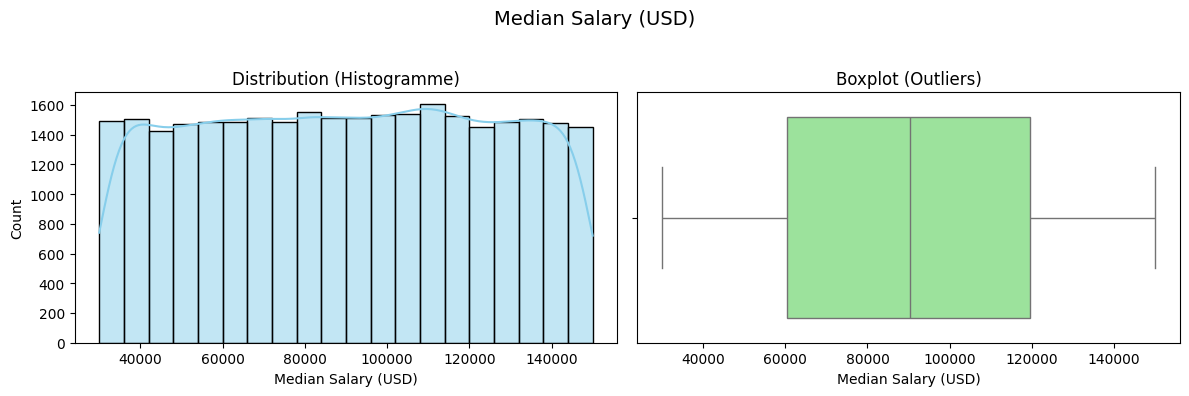

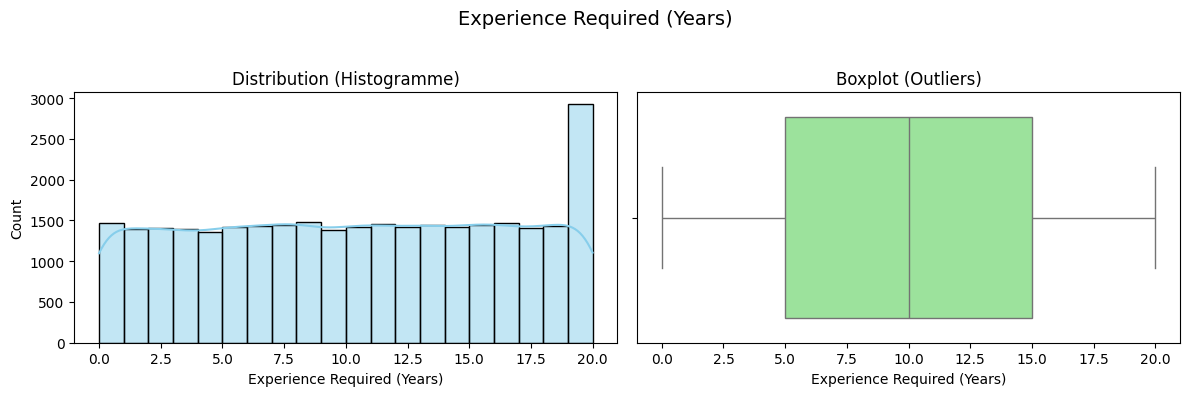

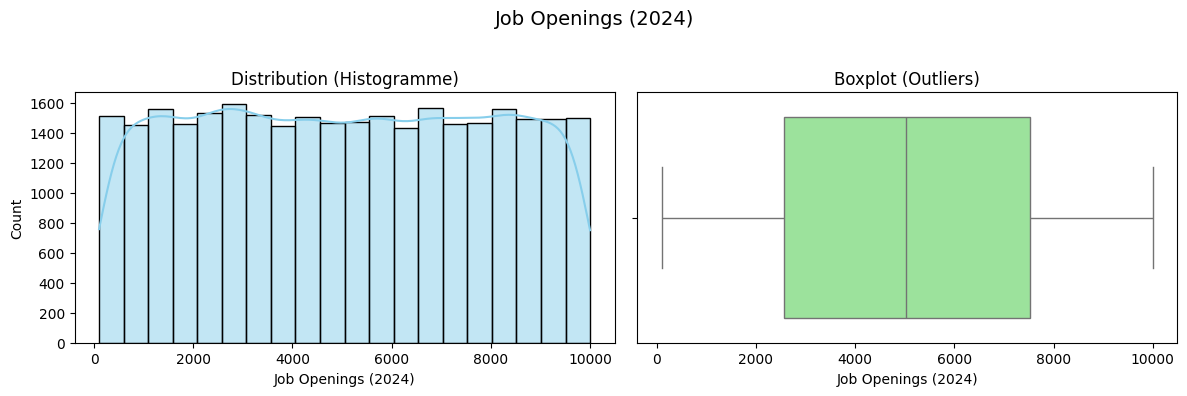

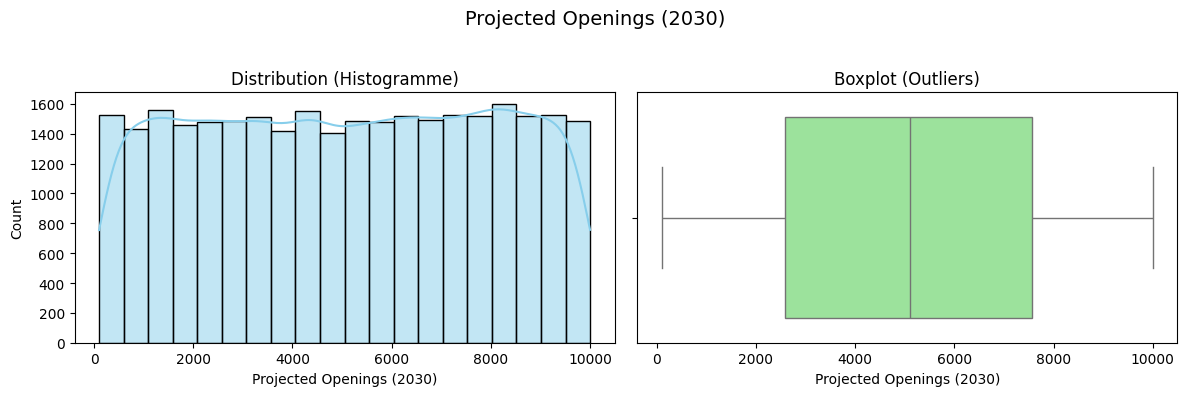

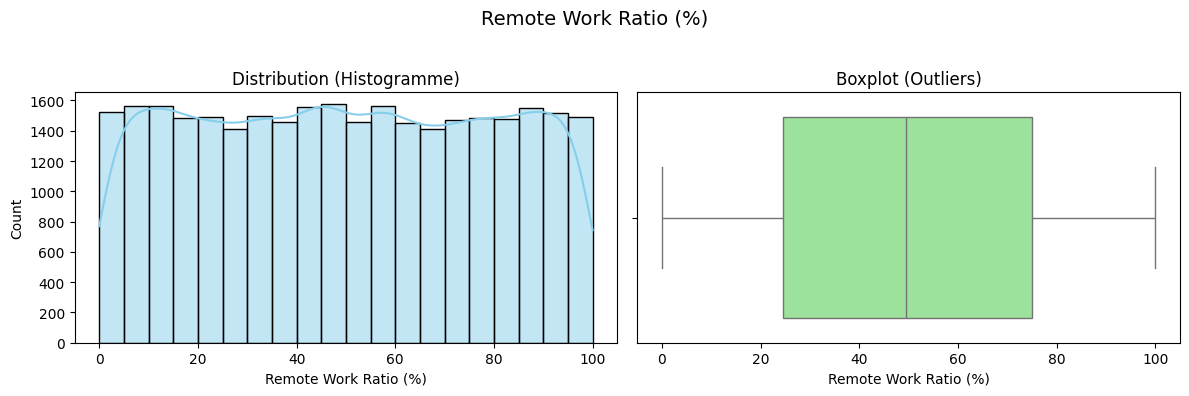

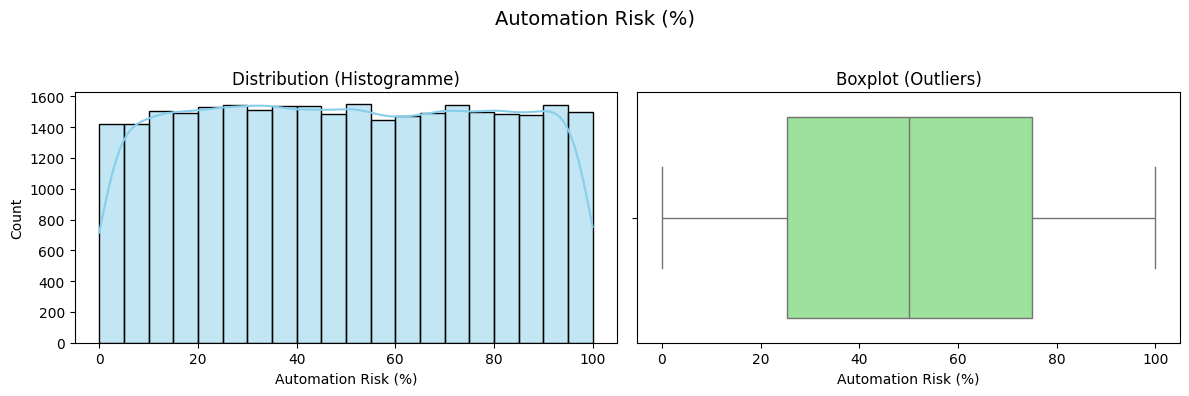

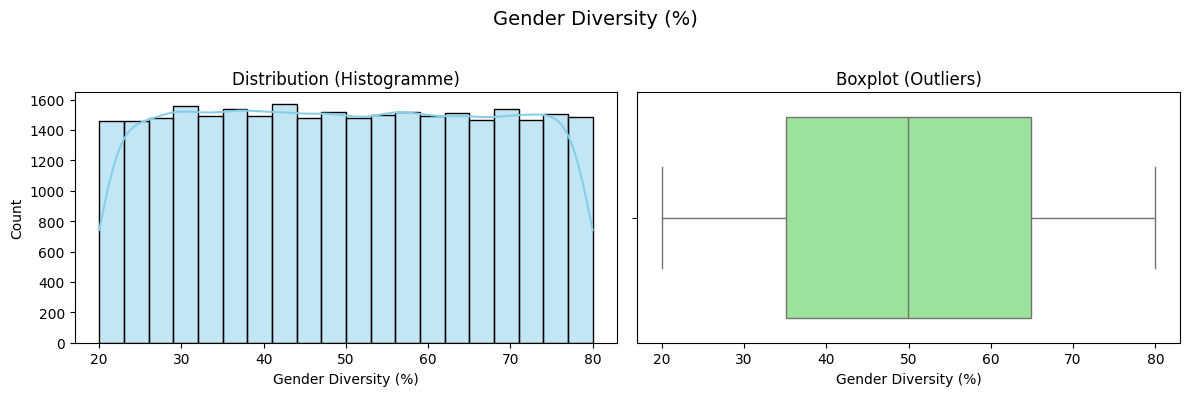

In [34]:

# --- Histogrammes + Boxplots pour variables numériques ---
for col in quantitative_cols:
    plt.figure(figsize=(12,4))
    plt.suptitle(f"{col}", fontsize=14)
    # Histogramme
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=20, color="skyblue")
    plt.title("Distribution (Histogramme)")
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title("Boxplot (Outliers)")

    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()


C:\Users\meria\AppData\Local\Temp\ipykernel_12788\2897707411.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


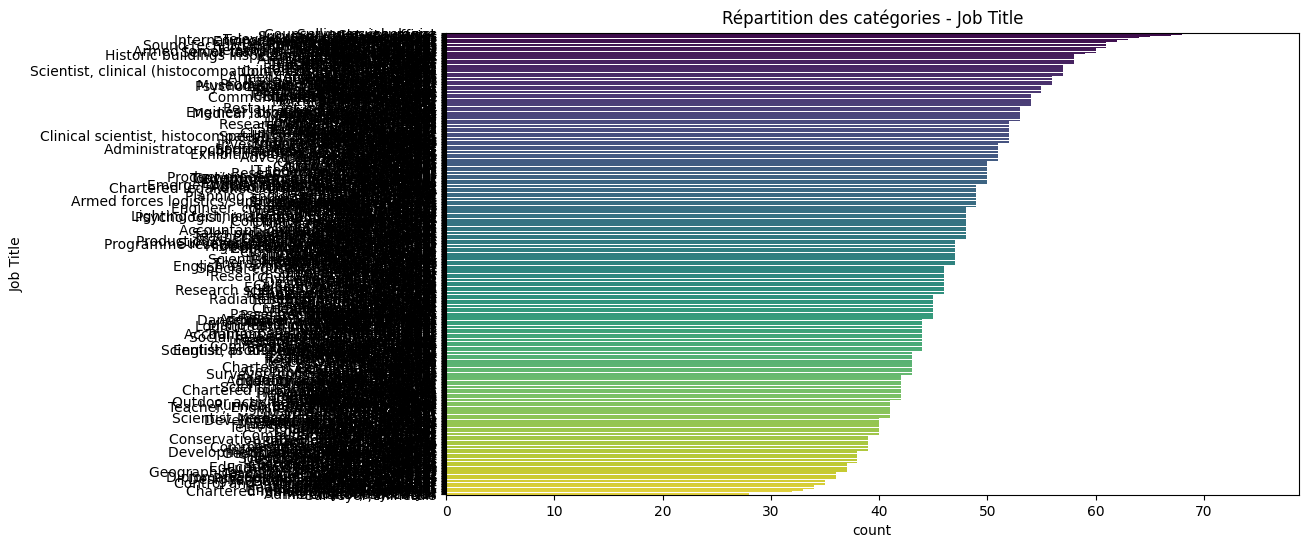

C:\Users\meria\AppData\Local\Temp\ipykernel_12788\2897707411.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


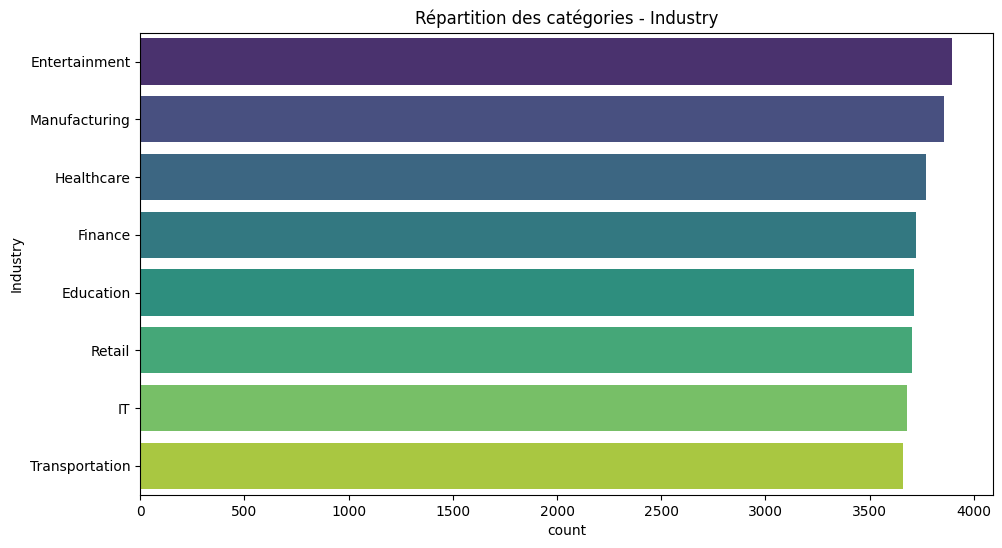

C:\Users\meria\AppData\Local\Temp\ipykernel_12788\2897707411.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


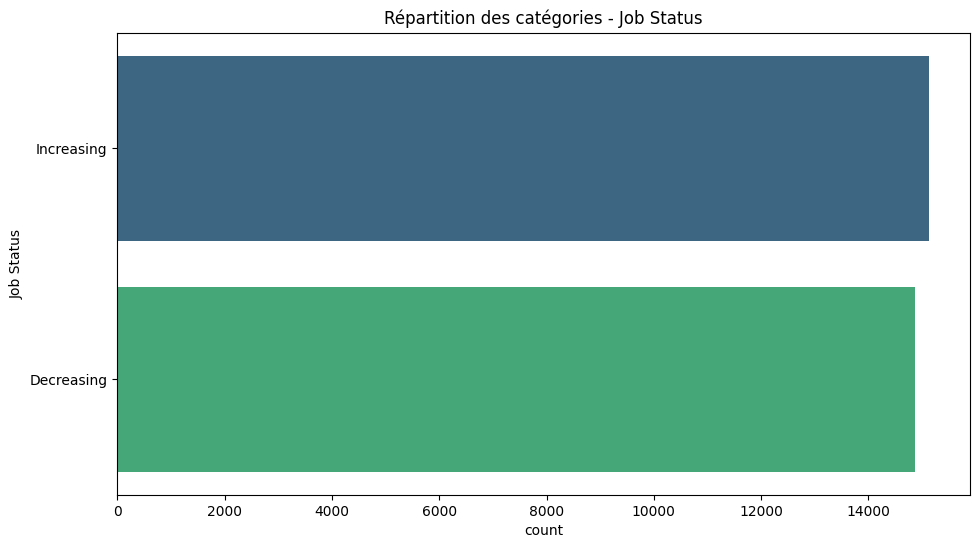

C:\Users\meria\AppData\Local\Temp\ipykernel_12788\2897707411.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


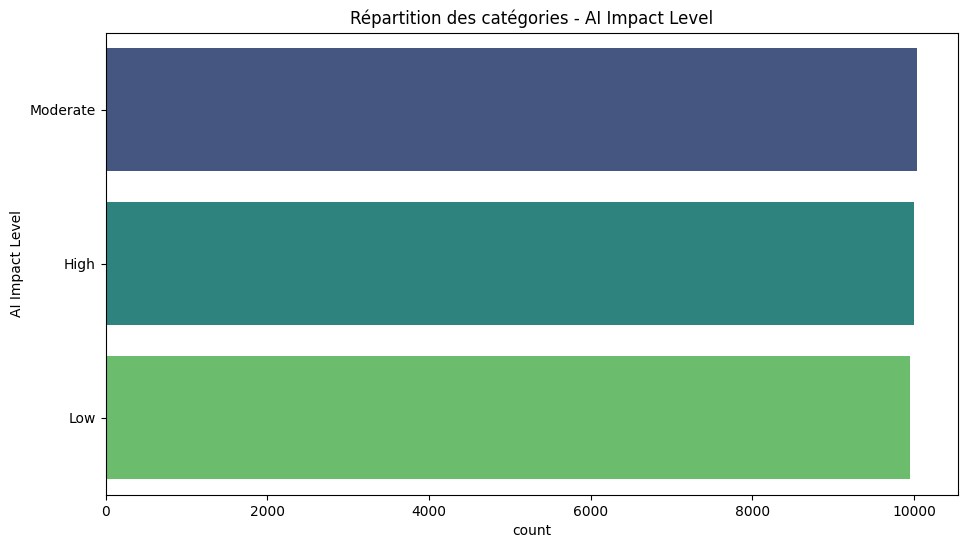

C:\Users\meria\AppData\Local\Temp\ipykernel_12788\2897707411.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


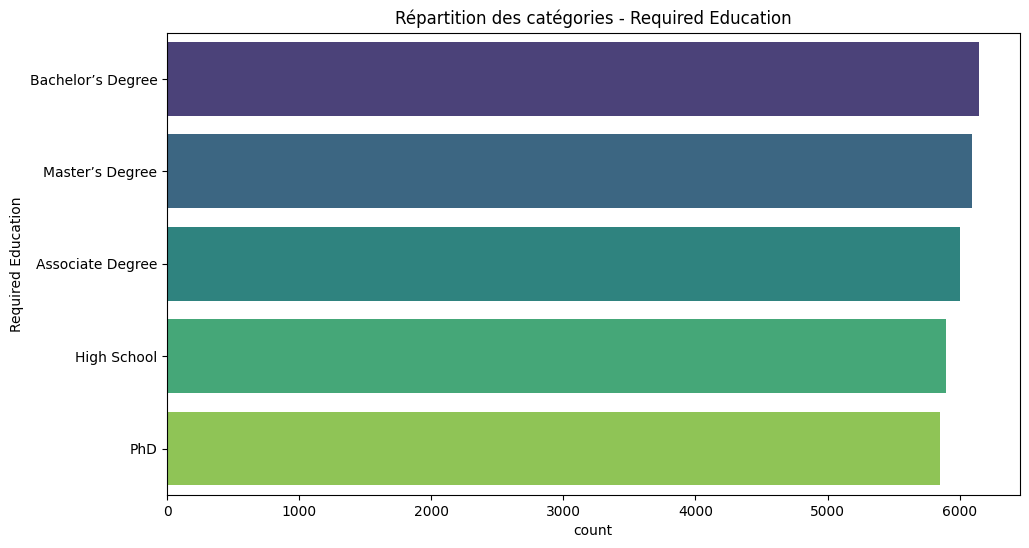

C:\Users\meria\AppData\Local\Temp\ipykernel_12788\2897707411.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


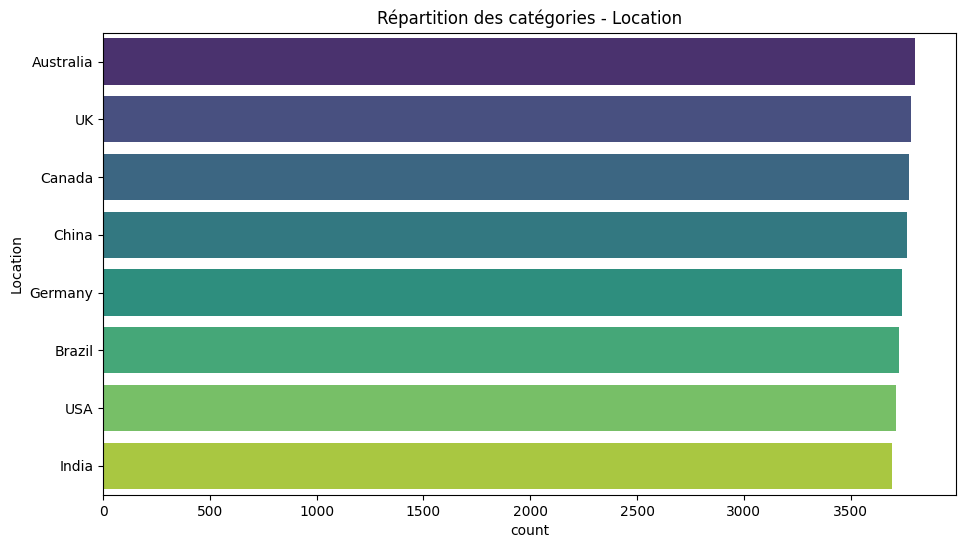

In [35]:
# --- Barplots pour variables catégorielles ---
for col in qualitative_cols:
    plt.figure(figsize=(11,6))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Répartition des catégories - {col}")
    plt.show()

**Qualité des données**

**Valeurs manquantes**

In [36]:
missing_count = df.isnull().sum()
missing_pct = (missing_count / len(df)) * 100
missing_summary = pd.DataFrame({
    'Valeurs manquantes': missing_count,
    '% manquantes': missing_pct.round(2)
})
display(missing_summary)

,Valeurs manquantes,% manquantes
Job Title,0,0.0
Industry,0,0.0
Job Status,0,0.0
AI Impact Level,0,0.0
Median Salary (USD),0,0.0
Required Education,0,0.0
Experience Required (Years),0,0.0
Job Openings (2024),0,0.0
Projected Openings (2030),0,0.0
Remote Work Ratio (%),0,0.0


**Doublons et Valeurs uniques**

In [37]:
print("\nUnique values per column:")
print(df.nunique(dropna=False))

# Duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nLignes dupliquées: {duplicate_rows}")


Unique values per column:
Job Title                        639
Industry                           8
Job Status                         2
AI Impact Level                    3
Median Salary (USD)            29968
Required Education                 5
Experience Required (Years)       21
Job Openings (2024)             9439
Projected Openings (2030)       9410
Remote Work Ratio (%)           9466
Automation Risk (%)             9519
Location                           8
Gender Diversity (%)            5965
dtype: int64

Lignes dupliquées: 0


In [38]:
print("\nTop 5 valeurs les plus fréquentes (catégorielles) :")
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col} :")
    print(df[col].value_counts(dropna=False).head())
cat_candidates = ['Job Title','Industry','Location','AI Impact Level','Required Education','Job Status']
for c in cat_candidates:
    if c in df.columns:
        print(f"\nTop values for {c}:")
        print(df[c].value_counts(dropna=False).head(10))


Top 5 valeurs les plus fréquentes (catégorielles) :

Job Title :
Job Title
Surveyor, insurance         75
Counselling psychologist    70
Charity officer             68
Surveyor, land/geomatics    67
Hydrogeologist              66
Name: count, dtype: int64

Industry :
Industry
Entertainment    3895
Manufacturing    3855
Healthcare       3771
Finance          3721
Education        3714
Name: count, dtype: int64

Job Status :
Job Status
Increasing    15136
Decreasing    14864
Name: count, dtype: int64

AI Impact Level :
AI Impact Level
Moderate    10042
High        10005
Low          9953
Name: count, dtype: int64

Required Education :
Required Education
Bachelor’s Degree    6146
Master’s Degree      6097
Associate Degree     6003
High School          5900
PhD                  5854
Name: count, dtype: int64

Location :
Location
Australia    3802
UK           3784
Canada       3775
China        3763
Germany      3741
Name: count, dtype: int64

Top values for Job Title:
Job Title
Surveyor,

**VISUALISATIONS EXPLORATOIRES**

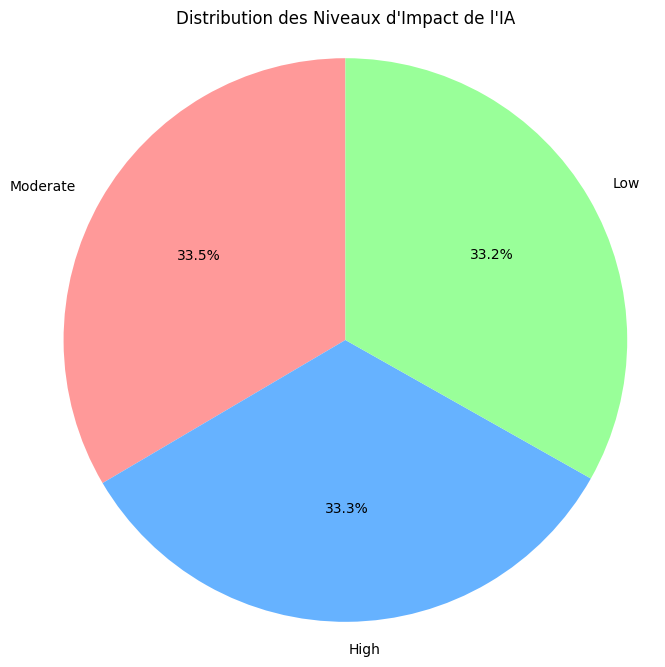

In [39]:
#def create_advanced_visualizations(df):

# Distribution des Niveaux d'Impact de l'IA
plt.figure(figsize=(8, 8))
ai_impact_counts = df['AI Impact Level'].value_counts()
plt.pie(ai_impact_counts, labels=ai_impact_counts.index, autopct='%1.1f%%', colors=['#FF9999', '#66B2FF', '#99FF99'], startangle=90)
plt.title('Distribution des Niveaux d\'Impact de l\'IA')
plt.axis('equal')
plt.show()

C:\Users\meria\AppData\Local\Temp\ipykernel_12788\140761987.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AI Impact Level', y='Median Salary (USD)', data=df, palette='viridis')


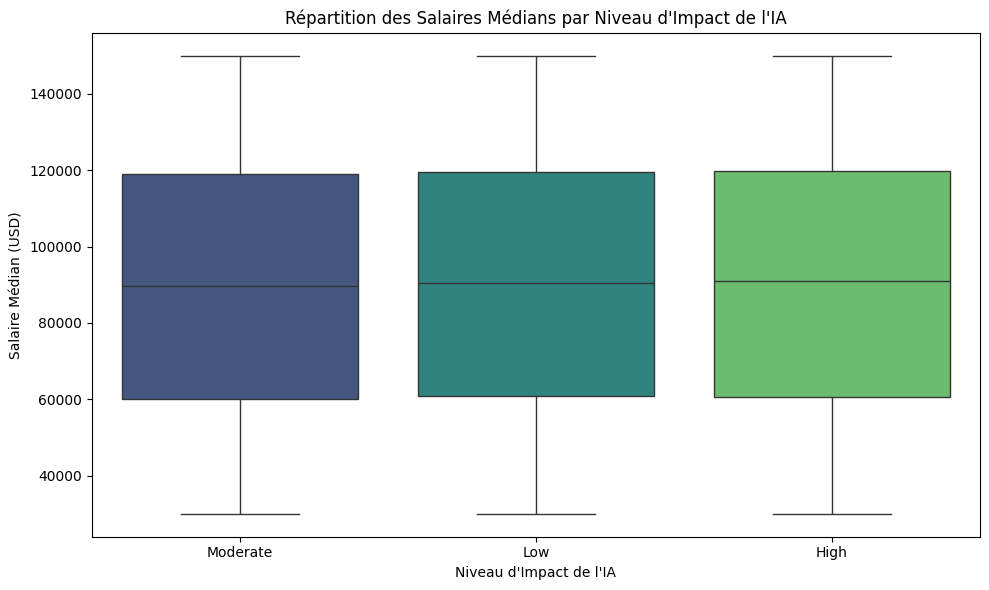

In [40]:
# Salaire médian par niveau d’impact de l’IA
plt.figure(figsize=(10, 6))
sns.boxplot(x='AI Impact Level', y='Median Salary (USD)', data=df, palette='viridis')
plt.title('Répartition des Salaires Médians par Niveau d\'Impact de l\'IA')
plt.xlabel('Niveau d\'Impact de l\'IA')
plt.ylabel('Salaire Médian (USD)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

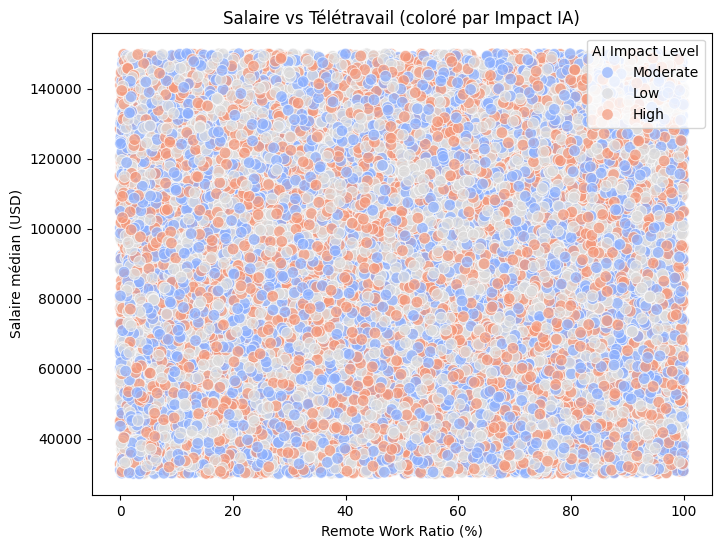

In [41]:
# Salaire vs Télétravail
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="Remote Work Ratio (%)",
    y="Median Salary (USD)",
    hue="AI Impact Level",
    palette="coolwarm",
    alpha=0.7, s=70
)
plt.title("Salaire vs Télétravail (coloré par Impact IA)")
plt.xlabel("Remote Work Ratio (%)")
plt.ylabel("Salaire médian (USD)")
plt.legend(title="AI Impact Level")
plt.show()

C:\Users\meria\AppData\Local\Temp\ipykernel_12788\187256271.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


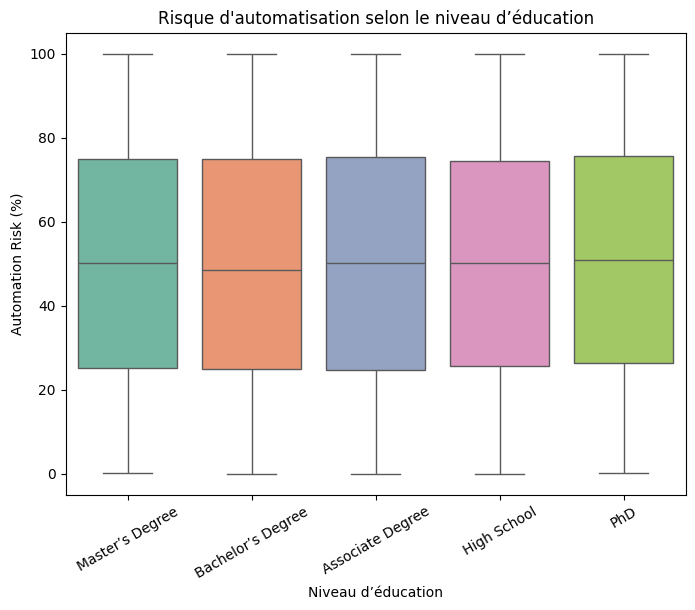

In [42]:
# Automatisation vs Éducation
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x="Required Education",
    y="Automation Risk (%)",
    palette="Set2"
)
plt.xticks(rotation=30)
plt.title("Risque d'automatisation selon le niveau d’éducation")
plt.xlabel("Niveau d’éducation")
plt.ylabel("Automation Risk (%)")
plt.show()



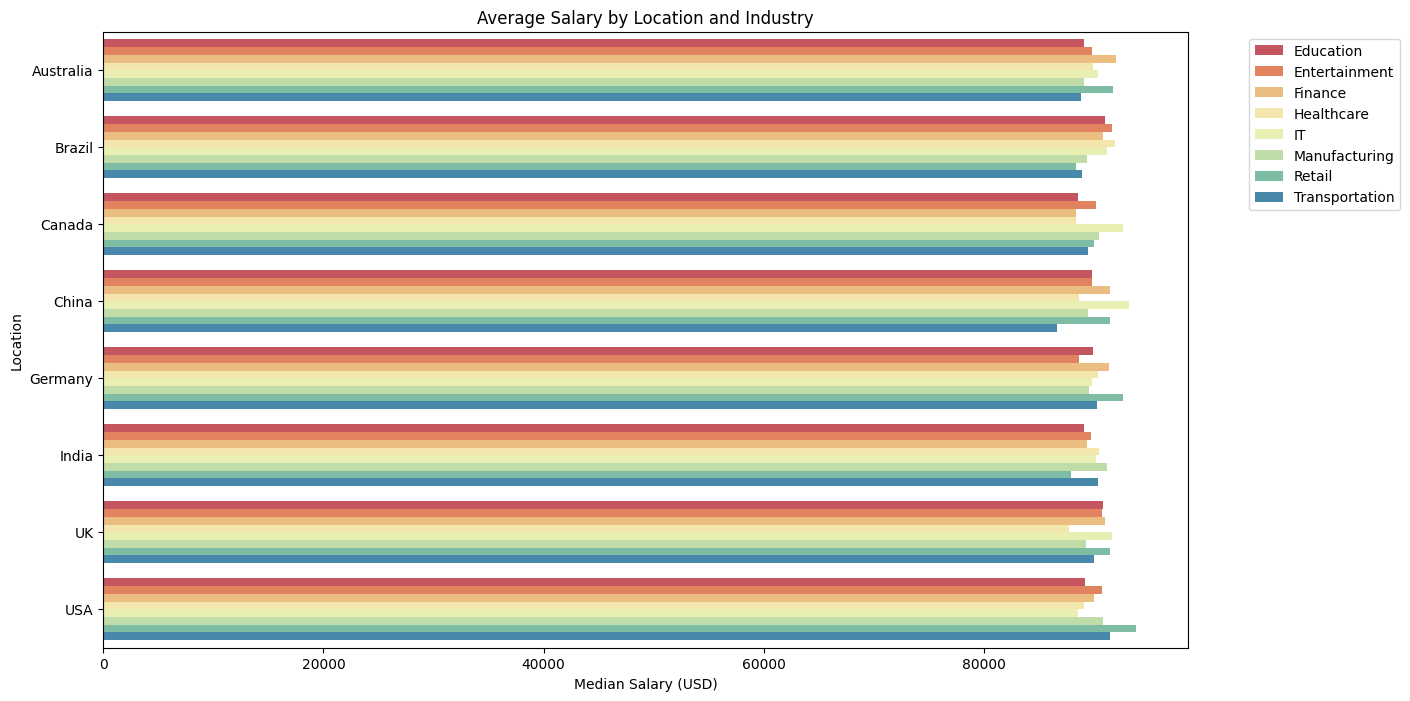

In [43]:
# Salaire moyen par pays et industrie
grouped = df.groupby(['Location', 'Industry'])['Median Salary (USD)'].mean().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped, x='Median Salary (USD)', y='Location', hue='Industry', palette='Spectral')
plt.title("Average Salary by Location and Industry")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Matrice de corrélation**

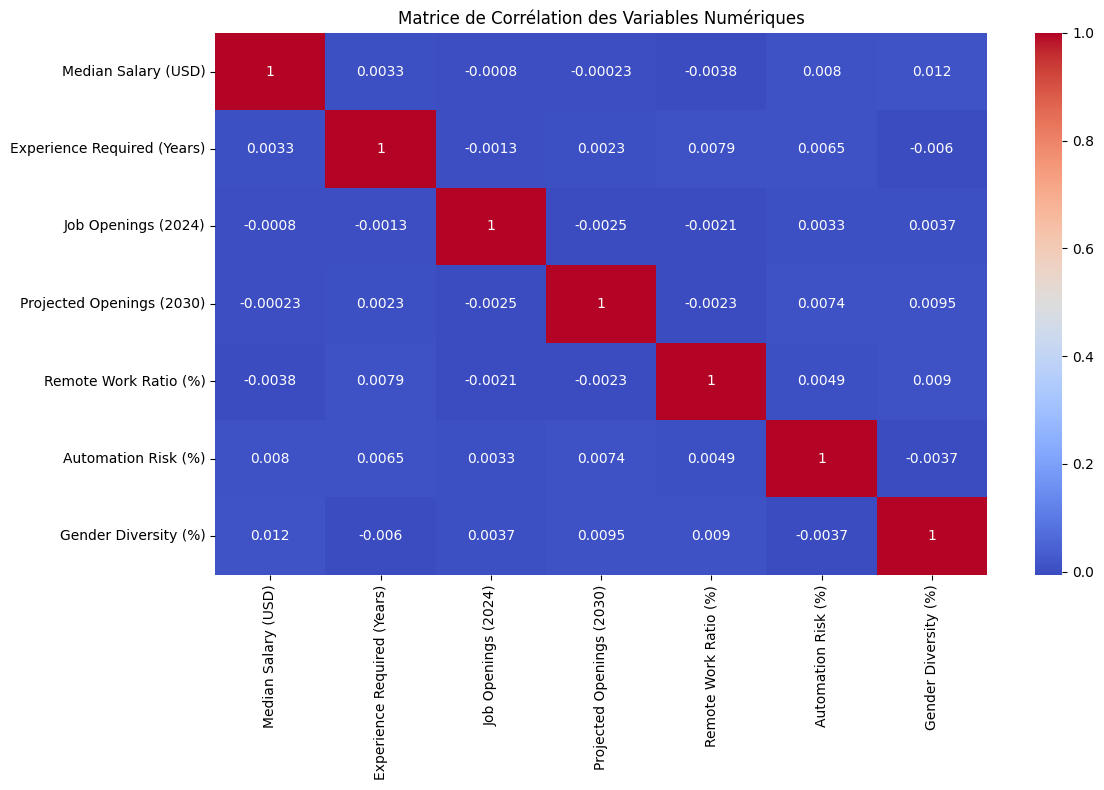

'\n# Example: drop features if correlation > 0.9 (adjust as needed)\ncorr_matrix = df[numeric_cols].corr().abs()\nupper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))\nto_drop = [c for c in upper.columns if any(upper[c] > 0.9)]\nprint("\nHighly correlated features to drop:", to_drop)\ndf = df.drop(columns=to_drop)\n'

In [44]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[quantitative_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation des Variables Numériques')
plt.tight_layout()
plt.show()
"""
# Example: drop features if correlation > 0.9 (adjust as needed)
corr_matrix = df[numeric_cols].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [c for c in upper.columns if any(upper[c] > 0.9)]
print("\nHighly correlated features to drop:", to_drop)
df = df.drop(columns=to_drop)
"""

#**DATA PREPARATION - NETTOYAGE ET PRÉPARATION**



> Pas de valeurs manquantes, ni doublons.
  Les outliers numériques sont traités par IQR capping (on réduit leur influence sans les supprimer).



***Nettoyage des données***

In [45]:
#TRAITEMENT DES VALEURS MANQUANTES
df_clean = df.copy()

missing_before = df_clean.isnull().sum()
print(f"Valeurs manquantes avant traitement:\n{missing_before[missing_before > 0]}")

# Vérification et traitement des valeurs manquantes
for col in df_clean.columns:
    if df_clean[col].isnull().sum() > 0:
        if df_clean[col].dtype in ['float64', 'int64']:
            # Pour les numériques: médiane (plus robuste aux outliers)
            df_clean[col].fillna(df_clean[col].median(), inplace=True)
        else:
            # Pour les catégorielles: mode ou 'unknown'
            df_clean[col].fillna(df_clean[col].mode()[0] if not df_clean[col].mode().empty else 'unknown', inplace=True)

# Traitement des doublons
print(f"Doublons avant suppression: {df_clean.duplicated().sum()}")
df_clean = df_clean.drop_duplicates()
print(f"Doublons après suppression: {df_clean.duplicated().sum()}")


Valeurs manquantes avant traitement:
Series([], dtype: int64)
Doublons avant suppression: 0
Doublons après suppression: 0


In [46]:
def outliers_iqr(df, cols=None):
    df2 = df.copy()
    for col in cols:
        Q1 = df2[col].quantile(0.25)
        Q3 = df2[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df2[col] = np.where(df2[col] < lower, lower, df2[col])
        df2[col] = np.where(df2[col] > upper, upper, df2[col])
    return df2
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
df_clean = outliers_iqr(df_clean, cols=numeric_cols)
print("capped shape:", df_clean.shape)


capped shape: (30000, 13)


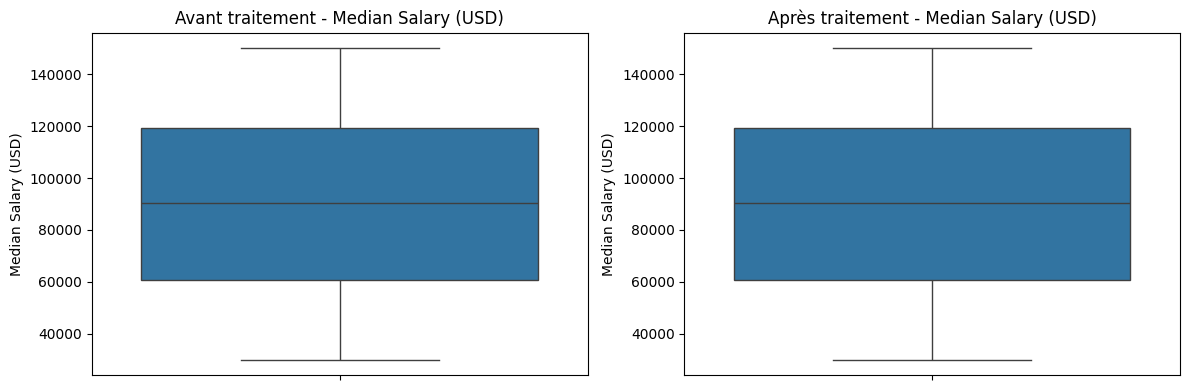

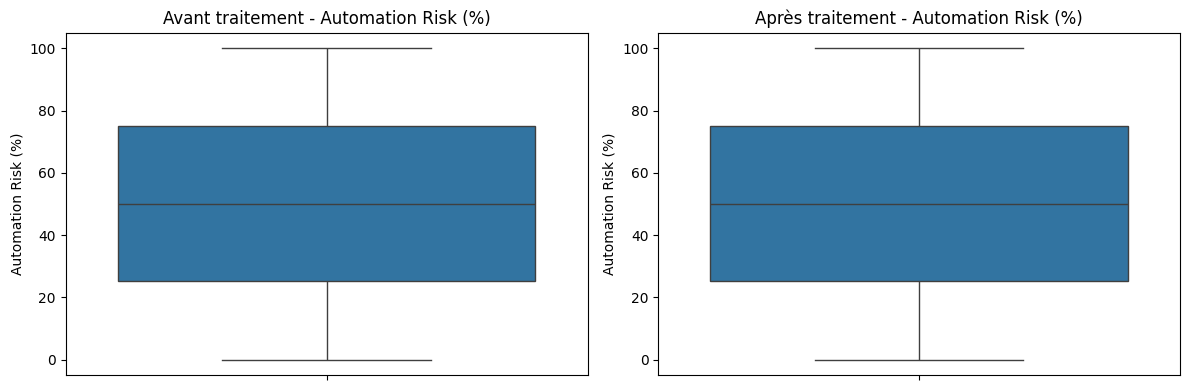

In [47]:
# Visualisation avant/après traitement des outliers
for col in ['Median Salary (USD)', 'Automation Risk (%)']:
    if col in df_clean.columns:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        sns.boxplot(y=df[col], ax=ax1)
        ax1.set_title(f'Avant traitement - {col}')
        sns.boxplot(y=df_clean[col], ax=ax2)
        ax2.set_title(f'Après traitement - {col}')
        plt.tight_layout()
        plt.show()


**TEXT NORMALIZATION**

In [48]:
# NORMALISATION DU TEXTE
def normalize_text(df):
    df['Required Education'] = df['Required Education'].str.replace('â€™', '’', regex=False)
    for col in qualitative_cols:
        df[col] = df[col].astype(str).str.lower().str.strip()
    return df
df_clean = normalize_text(df_clean)
print("After text normalization:")
print(f" Cleaned dataset shape: {df_clean.shape}")


After text normalization:
 Cleaned dataset shape: (30000, 13)


**Feature engineering**

In [49]:
def feature_engineering(df):
    df_fe = df.copy()

    # Growth metrics
    df_fe['Growth (%)'] = ((df_fe['Projected Openings (2030)'] - df_fe['Job Openings (2024)']) /
                          df_fe['Job Openings (2024)']) * 100
    df_fe['Growth (%)'] = df_fe['Growth (%)'].fillna(0)

    # Growth categories
    def classify_growth(g):
        if g < -10: return 'decline'
        elif g < 10: return 'stable'
        else: return 'high_growth'

    df_fe['Growth_Category'] = df_fe['Growth (%)'].apply(classify_growth)

    # Composite indices
    df_fe['Vulnerability_Index'] = (df_fe['Automation Risk (%)'] *
                                   (100 - df_fe['Remote Work Ratio (%)']) / 100)
    df_fe['Attractiveness_Score'] = (df_fe['Median Salary (USD)'] -
                                    df_fe['Automation Risk (%)'] * 1000)
    # Job stability score
    df_fe['Job_Stability_Score'] = (100 - df_fe['Automation Risk (%)']) + df_fe['Growth (%)']

    return df_fe
df_engineered = feature_engineering(df_clean)

**Data Transformation**

In [50]:
def encode_categorical(df):
    df_encoded = df_clean.copy()

    # 1. ORDINAL ENCODING (variables with natural order)
    education_mapping = {
        "high school": 1,
        "associate degree": 2,
        "bachelor's degree": 3,
        "master's degree": 4,
        "phd": 5,
        "unknown": 2  # Handle unknown values
    }

    ai_impact_mapping = {"low": 1, "moderate": 2, "high": 3, "unknown": 2}
    job_status_mapping = {"decreasing": 0, "increasing": 1, "unknown": 0.5}

    # Apply ordinal encoding
    df_encoded['Education_Num'] = df_encoded['Required Education'].map(education_mapping)
    df_encoded['AI_Impact_Num'] = df_encoded['AI Impact Level'].map(ai_impact_mapping)
    df_encoded['Job_Status_Num'] = df_encoded['Job Status'].map(job_status_mapping)

    # Handle missing mappings
    df_encoded['Education_Num'] = df_encoded['Education_Num'].fillna(2)  # Default to associate
    df_encoded['AI_Impact_Num'] = df_encoded['AI_Impact_Num'].fillna(2)  # Default to moderate
    df_encoded['Job_Status_Num'] = df_encoded['Job_Status_Num'].fillna(0.5)

    # ONE-HOT ENCODING for nominal variables
    nominal_cols = ['Industry', 'Location']

    for col in nominal_cols:
        if col in df_encoded.columns:
            n_unique = df_encoded[col].nunique()
            if n_unique <= 15:
                dummies = pd.get_dummies(df_encoded[col], prefix=col)
                df_encoded = pd.concat([df_encoded, dummies], axis=1)
                print(f" {col} one-hot encoded ({n_unique} categories)")
            else:
                le = LabelEncoder()
                df_encoded[f'{col}_Label'] = le.fit_transform(df_encoded[col].astype(str))
                print(f" {col} -> Label Encoding (high cardinality: {n_unique})")

    # 3. Drop original categorical columns to avoid duplication
    cols_to_drop = ['Required Education', 'AI Impact Level', 'Job Status', 'Industry', 'Location']
    df_encoded = df_encoded.drop(columns=[col for col in cols_to_drop if col in df_encoded.columns])

    print(f" Final shape after encoding: {df_encoded.shape}")
    return df_encoded

df_encoded = encode_categorical(df_engineered)

 Industry one-hot encoded (8 categories)
 Location one-hot encoded (8 categories)
 Final shape after encoding: (30000, 27)


In [51]:
from sklearn.preprocessing import StandardScaler

def normalize_features_simple(df):
    df_scaled = df.copy()
    numeric_cols = df_scaled.select_dtypes(include=[np.number]).columns.tolist()
    print(numeric_cols)
    print(f"Scaling {len(numeric_cols)} numeric columns")
    scaler = StandardScaler()
    if numeric_cols:
        df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])
        print(f"Applied StandardScaler to {len(numeric_cols)} features")
    return df_scaled, scaler

# Usage
df_scaled, fitted_scaler = normalize_features_simple(df_encoded)


['Median Salary (USD)', 'Experience Required (Years)', 'Job Openings (2024)', 'Projected Openings (2030)', 'Remote Work Ratio (%)', 'Automation Risk (%)', 'Gender Diversity (%)', 'Education_Num', 'AI_Impact_Num', 'Job_Status_Num']
Scaling 10 numeric columns
Applied StandardScaler to 10 features


In [52]:
# Save the prepared dataset (BEFORE PCA)
df_scaled.to_csv(OUTPUT_PREPARED_CSV, index=False)
print(f"💾 Prepared dataset saved: {OUTPUT_PREPARED_CSV}")
print(f"📊 Final shape: {df_scaled.shape}")
print(f"Original dataset: {df.shape}")
print(f"After cleaning: {df_clean.shape}")
print(f"After encoding: {df_encoded.shape}")
print(f"After scaling: {df_scaled.shape}")
print(f"After feature selection: {df_scaled.shape}")
print(f"Total features reduced by: {((df.shape[1] - df_scaled.shape[1]) / df.shape[1] * 100):.1f}%")
df_scaled.head(5)

💾 Prepared dataset saved: prepared_data.csv
📊 Final shape: (30000, 27)
Original dataset: (30000, 13)
After cleaning: (30000, 13)
After encoding: (30000, 27)
After scaling: (30000, 27)
After feature selection: (30000, 27)
Total features reduced by: -107.7%


,Job Title,Median Salary (USD),Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Gender Diversity (%),Education_Num,AI_Impact_Num,...,Industry_retail,Industry_transportation,Location_australia,Location_brazil,Location_canada,Location_china,Location_germany,Location_india,Location_uk,Location_usa
0,investment analyst,-1.395182,-0.833491,-1.231978,0.442275,0.211404,-0.760726,-0.309688,-0.289604,-0.002125,...,False,False,False,False,False,False,False,False,True,False
1,"journalist, newspaper",1.225715,0.816517,-1.327050,0.394481,-1.140171,1.375642,0.949982,-0.289604,-0.002125,...,False,False,False,False,False,False,False,False,False,True
2,financial planner,1.544813,-0.998491,-0.594779,-1.367596,1.449398,0.793470,-0.512300,-0.289604,-1.228161,...,False,False,False,False,True,False,False,False,False,False
3,legal secretary,0.216677,0.816517,0.745679,-0.353817,-1.655254,1.731413,0.913511,-0.289604,1.223911,...,False,False,True,False,False,False,False,False,False,False
4,aeronautical engineer,-0.847490,0.486516,0.316103,0.809970,0.135453,-0.434863,1.307737,-0.289604,-1.228161,...,False,False,False,False,False,False,True,False,False,False


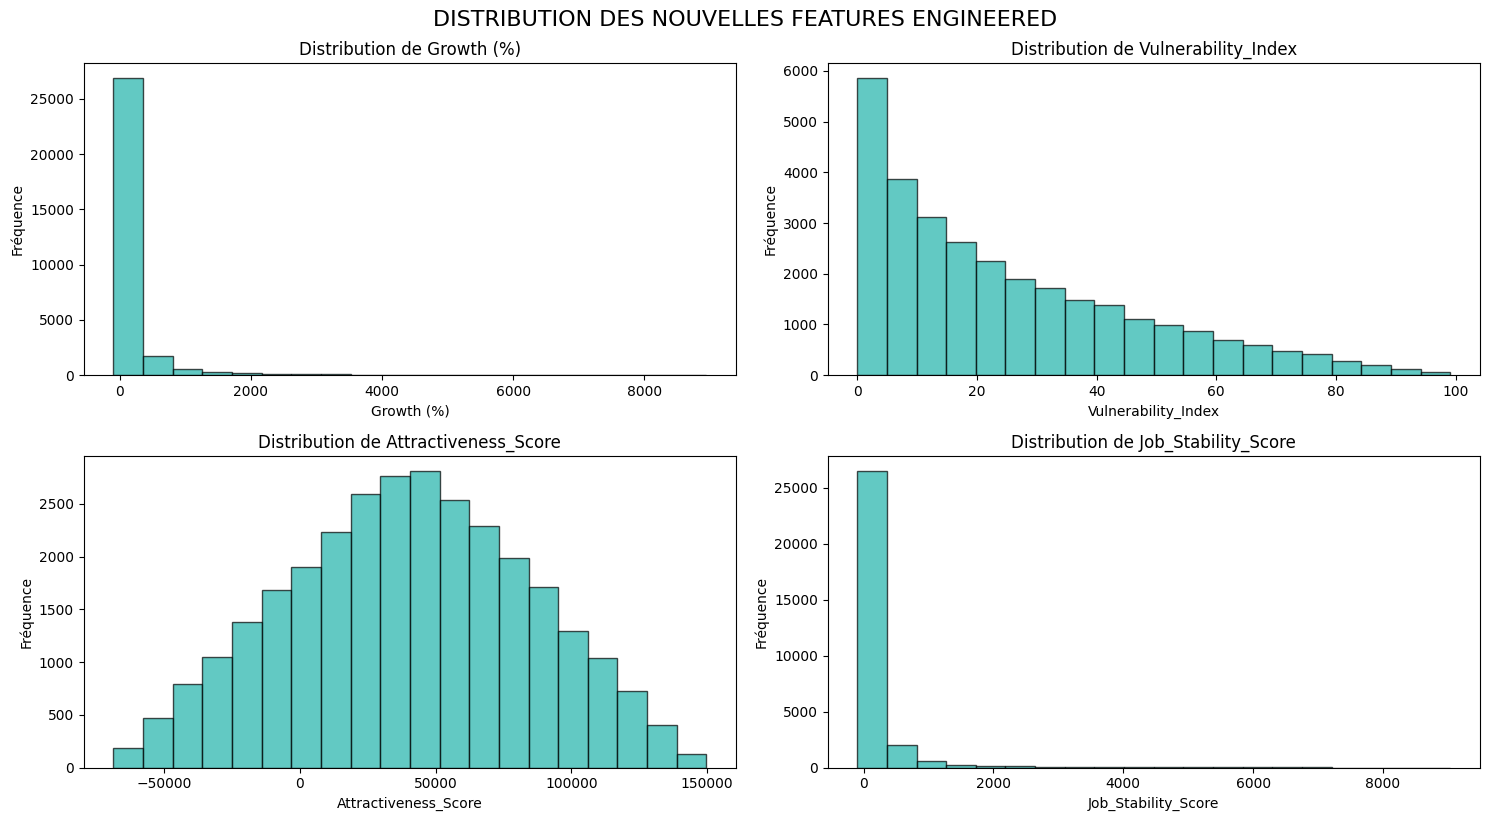

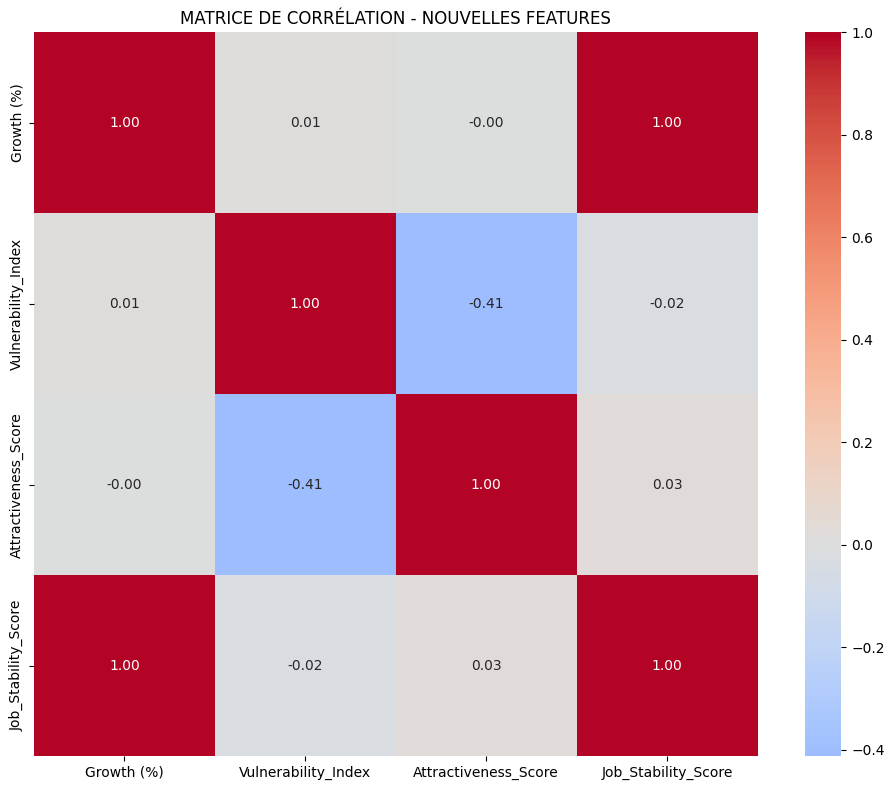

In [53]:

# Distribution des nouvelles features
new_numeric_features = ['Growth (%)', 'Vulnerability_Index', 'Attractiveness_Score', 'Job_Stability_Score']

# Filter only features that exist
existing_features = [f for f in new_numeric_features if f in df_engineered.columns]

if existing_features:
    n_features = len(existing_features)
    n_cols = 2
    n_rows = (n_features + 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    axes = axes.ravel() if n_features > 1 else [axes]

    for i, feature in enumerate(existing_features):
        axes[i].hist(df_engineered[feature], bins=20, alpha=0.7, color='lightseagreen', edgecolor='black')
        axes[i].set_title(f'Distribution de {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Fréquence')

    # Hide empty subplots
    for i in range(n_features, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.suptitle('DISTRIBUTION DES NOUVELLES FEATURES ENGINEERED', fontsize=16, y=1.02)
    plt.show()

    # Correlation des nouvelles features
    plt.figure(figsize=(10, 8))
    new_features_corr = df_engineered[existing_features].corr()
    sns.heatmap(new_features_corr, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f')
    plt.title('MATRICE DE CORRÉLATION - NOUVELLES FEATURES')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️  No engineered features found for visualization")


# **PCA**

Removing non-numeric columns before PCA: ['Job Title', 'Industry_education', 'Industry_entertainment', 'Industry_finance', 'Industry_healthcare', 'Industry_it', 'Industry_manufacturing', 'Industry_retail', 'Industry_transportation', 'Location_australia', 'Location_brazil', 'Location_canada', 'Location_china', 'Location_germany', 'Location_india', 'Location_uk', 'Location_usa']
Data for PCA: 30000 rows x 10 features
  Dimension  Valeur propre  % var expliquée  % cum. var. expliquée
0      Dim1       1.031120           10.311                 10.311
1      Dim2       1.020058           10.200                 20.511
2      Dim3       1.013431           10.134                 30.645
3      Dim4       1.004560           10.045                 40.690
4      Dim5       1.000311           10.003                 50.693
5      Dim6       0.997914            9.979                 60.672
6      Dim7       0.996267            9.962                 70.634
7      Dim8       0.988191            9.882  

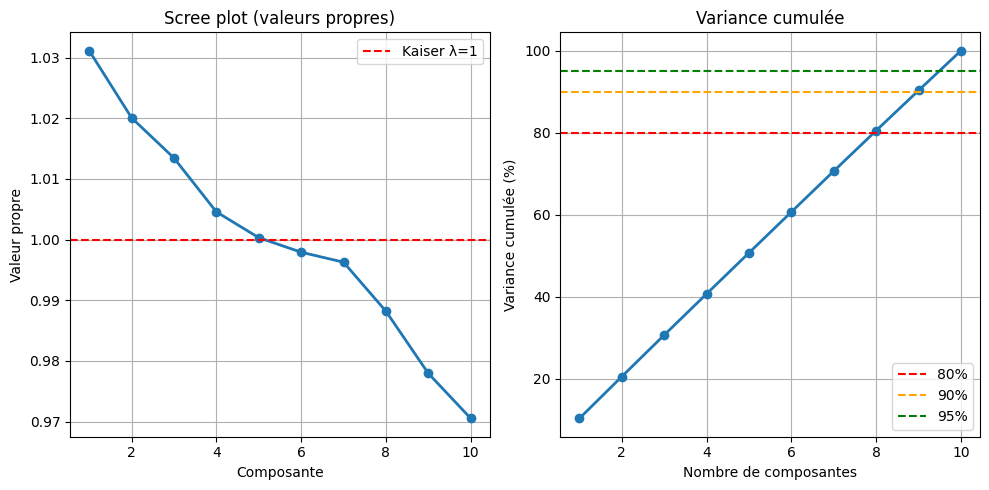


Top loadings (PC1):
Education_Num                  0.518663
Job_Status_Num                 0.415360
Remote Work Ratio (%)          0.408986
Automation Risk (%)            0.382841
Experience Required (Years)    0.325614
Median Salary (USD)            0.244025
Projected Openings (2030)      0.235543
Gender Diversity (%)           0.229386
Job Openings (2024)            0.040380
AI_Impact_Num                  0.021143
Name: PC1, dtype: float64


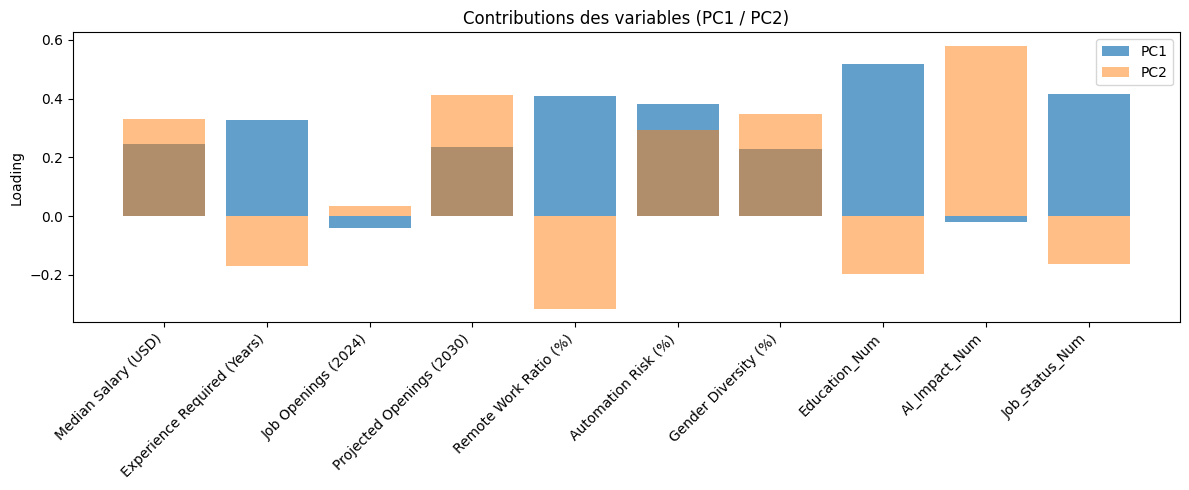

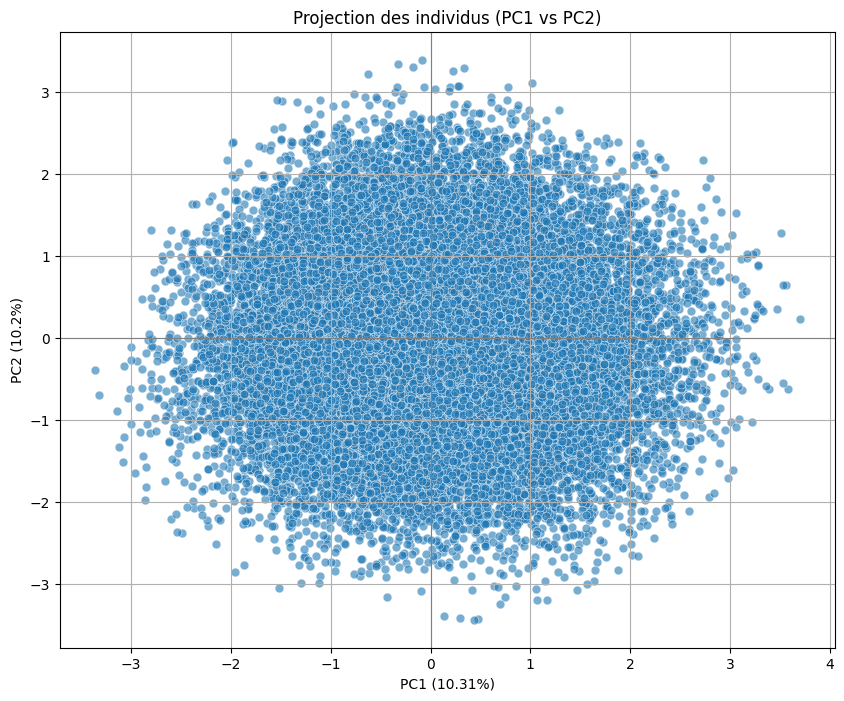

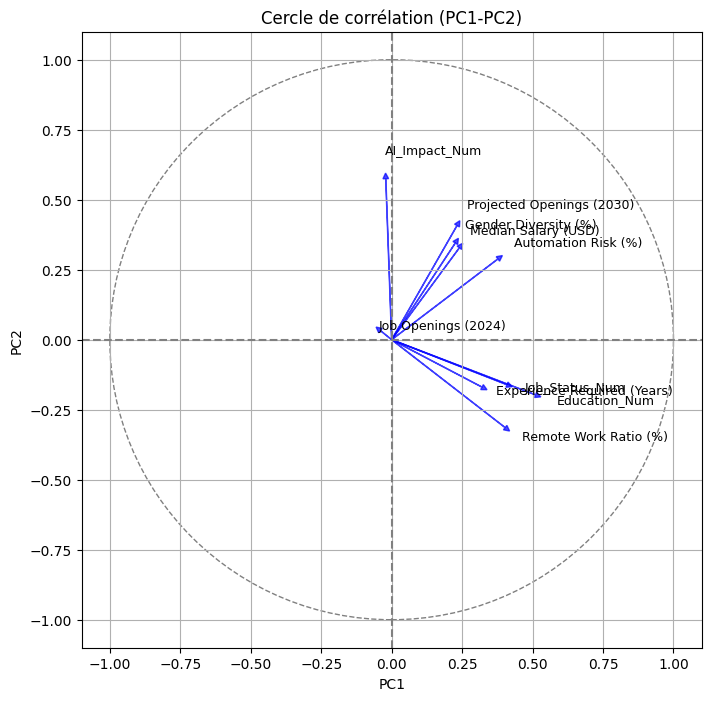

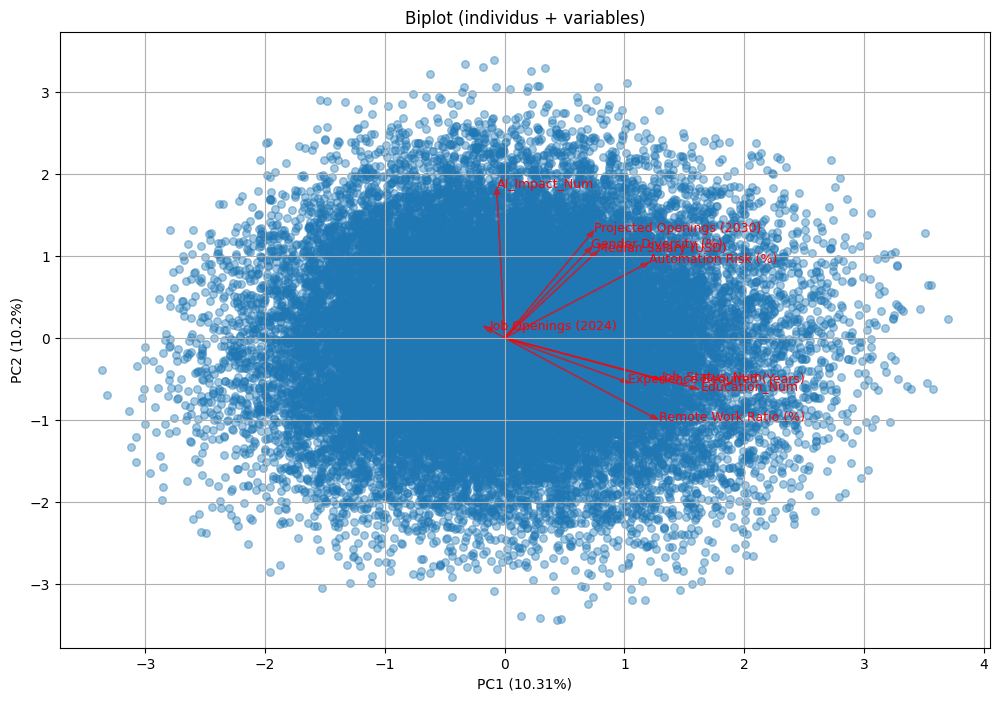


Recommendation: retenir 5 composantes (min(Kaiser, 85%))


In [54]:

# 1) Préparer les données numériques pour PCA
df_pca_input = df_scaled.copy()

# supprimer colonnes non numériques si présentes (Job Title, etc.)
non_numeric = df_pca_input.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric:
    print("Removing non-numeric columns before PCA:", non_numeric)
    df_pca_input = df_pca_input.drop(columns=non_numeric)

df_pca_input = df_pca_input.fillna(0)

X = df_pca_input.values
feature_names = df_pca_input.columns.tolist()
print(f"Data for PCA: {X.shape[0]} rows x {X.shape[1]} features")

# 2) Ajuster PCA (full)
pca = PCA()
PCs = pca.fit_transform(X)

# 3) Tableau des variances expliquées
explained_variance = pca.explained_variance_ratio_
eig = pd.DataFrame({
    "Dimension": [f"Dim{i+1}" for i in range(len(pca.explained_variance_))],
    "Valeur propre": pca.explained_variance_,
    "% var expliquée": np.round(explained_variance * 100, 3),
    "% cum. var. expliquée": np.round(np.cumsum(explained_variance) * 100, 3)
})
print(eig)

# 4) Critères pour choisir n_components
n_kaiser = (pca.explained_variance_ > 1).sum()
n_80 = int(np.argmax(np.cumsum(explained_variance) >= 0.80) + 1)
n_85 = int(np.argmax(np.cumsum(explained_variance) >= 0.85) + 1)
n_90 = int(np.argmax(np.cumsum(explained_variance) >= 0.90) + 1)
n_95 = int(np.argmax(np.cumsum(explained_variance) >= 0.95) + 1)

print(f"\nKaiser (λ>1) -> {n_kaiser} components")
print(f"Components for 80% variance -> {n_80}")
print(f"Components for 85% variance -> {n_85}")
print(f"Components for 90% variance -> {n_90}")
print(f"Components for 95% variance -> {n_95}")

# 5) Scree plot + variance cumulée
plt.figure(figsize=(10,5))
components = np.arange(1, len(explained_variance)+1)
plt.subplot(1,2,1)
plt.plot(components, pca.explained_variance_, 'o-', linewidth=2)
plt.axhline(1, color='r', linestyle='--', label='Kaiser λ=1')
plt.xlabel('Composante')
plt.ylabel('Valeur propre')
plt.title('Scree plot (valeurs propres)')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(components, np.cumsum(explained_variance)*100, 'o-', linewidth=2)
plt.axhline(80, color='r', linestyle='--', label='80%')
plt.axhline(90, color='orange', linestyle='--', label='90%')
plt.axhline(95, color='green', linestyle='--', label='95%')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance cumulée (%)')
plt.title('Variance cumulée')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 6) Loadings (contributions des variables)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, index=feature_names,
                           columns=[f'PC{i+1}' for i in range(loadings.shape[1])])
print("\nTop loadings (PC1):")
print(loadings_df['PC1'].abs().sort_values(ascending=False).head(10))

# Graphique contributions PC1/PC2
plt.figure(figsize=(12,5))
plt.bar(feature_names, loadings[:,0], alpha=0.7, label='PC1')
if loadings.shape[1] > 1:
    plt.bar(feature_names, loadings[:,1], alpha=0.5, label='PC2')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Loading')
plt.title('Contributions des variables (PC1 / PC2)')
plt.legend()
plt.tight_layout()
plt.show()

# 7) Projection (PC1,PC2) DataFrame + sauvegarde
pca_df = pd.DataFrame(PCs[:, :2], columns=['PC1','PC2'])
# si tu as des métadonnées dans l'original (Job Title, Growth_Category), les remettre si présentes
for meta in ['Job Title','Growth_Category','Automation Risk (%)','Location']:
    if meta in df_scaled.columns:
        pca_df[meta] = df_scaled[meta].values


# Scatter PC1 vs PC2
plt.figure(figsize=(10,8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', s=40, alpha=0.6)
plt.xlabel(f'PC1 ({round(explained_variance[0]*100,2)}%)')
plt.ylabel(f'PC2 ({round(explained_variance[1]*100,2)}%)')
plt.title('Projection des individus (PC1 vs PC2)')
plt.axhline(0, color='grey', linewidth=0.8)
plt.axvline(0, color='grey', linewidth=0.8)
plt.grid(True)
plt.show()

# 8) Cercle de corrélation (PC1-PC2)
pcs = pca.components_
x_vec = pcs[0,:]
y_vec = pcs[1,:]
plt.figure(figsize=(8,8))
circle = plt.Circle((0,0), 1, color='grey', fill=False, linestyle='--')
plt.gca().add_artist(circle)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
for i, name in enumerate(feature_names):
    plt.arrow(0,0, x_vec[i], y_vec[i], head_width=0.02, head_length=0.02, color='b', alpha=0.7)
    plt.text(x_vec[i]*1.15, y_vec[i]*1.15, name, fontsize=9)
plt.xlim(-1.1,1.1); plt.ylim(-1.1,1.1)
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('Cercle de corrélation (PC1-PC2)')
plt.grid(True); plt.show()

# 9) Biplot simple (individus + variables)
plt.figure(figsize=(12,8))
plt.scatter(PCs[:,0], PCs[:,1], alpha=0.4, s=30)
scale = max(PCs[:,0].std(), PCs[:,1].std()) * 3
for i, v in enumerate(pcs.T):
    plt.arrow(0, 0, v[0]*scale, v[1]*scale, color='red', alpha=0.6, head_width=0.05)
    plt.text(v[0]*scale*1.05, v[1]*scale*1.05, feature_names[i], color='red', fontsize=9)
plt.xlabel(f'PC1 ({round(explained_variance[0]*100,2)}%)')
plt.ylabel(f'PC2 ({round(explained_variance[1]*100,2)}%)')
plt.title('Biplot (individus + variables)')
plt.grid(True)
plt.show()

# 10) Recommandation automatique du nombre final de composantes
recommended = min(n_kaiser, n_85) if n_kaiser>0 else n_85
print(f"\nRecommendation: retenir {recommended} composantes (min(Kaiser, 85%))")


In [55]:
# --- 11) Création du dataset réduit PCA ---
n_components_final = recommended  # nombre final de composantes recommandé
pca_reduced = PCs[:, :n_components_final]

# Création du DataFrame réduit
reduced_cols = [f'PC{i+1}' for i in range(n_components_final)]
dataset_reduit = pd.DataFrame(pca_reduced, columns=reduced_cols)

# Ajouter les métadonnées si elles existent
for meta in ['Job Title','Growth_Category','Automation Risk (%)','Location']:
    if meta in df_scaled.columns:
        dataset_reduit[meta] = df_scaled[meta].values

# Sauvegarde CSV
dataset_reduit.to_csv(OUTPUT_PCA_CSV, index=False)
print(f"💾 Dataset réduit (PCA) sauvegardé: {OUTPUT_PCA_CSV}")
print(f"Shape: {dataset_reduit.shape}")

# Affichage rapide
dataset_reduit.head(5)


💾 Dataset réduit (PCA) sauvegardé: dataset_reduit.csv
Shape: (30000, 7)


,PC1,PC2,PC3,PC4,PC5,Job Title,Automation Risk (%)
0,-0.465116,-0.672850,-0.561938,-1.981323,-0.700107,investment analyst,-0.760726
1,1.232151,1.361355,-0.951615,-0.438689,1.598672,"journalist, newspaper",1.375642
2,0.807680,-1.111989,0.531558,0.568552,1.400645,financial planner,0.793470
3,0.626573,1.749179,-1.053427,1.077220,0.307930,legal secretary,1.731413
4,0.596676,-0.544602,0.555439,-1.100652,-0.481077,aeronautical engineer,-0.434863
